# Machine Learning 6156: Friday Batch 

## Team 6
<p> Neela Ayshwaria Alagappan :801137484
<p> Akhila Vemana             :801149644
<p> Jaya Sindhura Sadam       :801134228
<p> Srinath Muralinathan      :801135248

## EXPLORATORY DATA ANALYSIS

### Importing necessary  libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from subprocess import check_output

### Reading the dataset and assigning it to the variable train_df 

In [96]:
#reading in CSV's from a file path
train_df = pd.read_csv('survey.csv')

### Checking the data types of the columns present

In [97]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

### Finding the head of the data set which displays the top 5 rows from the dataset 

In [98]:
train_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### Finding the tail of the dataset which displays the number of rows passed as an argument from the last column of the dataset 

In [99]:
train_df.tail(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,9/12/2015 11:17,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,9/26/2015 1:07,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,11/7/2015 12:36,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,11/30/2015 21:25,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2/1/2016 23:04,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


### Checking for null values in the data set

In [100]:
train_df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

### Finding the number of rows and columns in the dataset by using shape

In [101]:
train_df.shape


(1259, 27)

### Dropping the columns 'comments' and 'state' which are not relevant for our future exploration and prediction

In [102]:
#dealing with missing data
#Let’s get rid of the variables "Timestamp",“comments”, “state” just to make our lives easier.
train_df = train_df.drop(['comments'], axis= 1)
train_df = train_df.drop(['state'], axis= 1)
train_df.shape

(1259, 25)

### Finding the head of the dataset again after removing the 2 columns. We can notice that the number of columns in reduced from 27 to 25 after dropping 2 columns. 

In [103]:
print(train_df.head(5))

         Timestamp  Age  Gender         Country self_employed family_history  \
0  8/27/2014 11:29   37  Female   United States           NaN             No   
1  8/27/2014 11:29   44       M   United States           NaN             No   
2  8/27/2014 11:29   32    Male          Canada           NaN             No   
3  8/27/2014 11:29   31    Male  United Kingdom           NaN            Yes   
4  8/27/2014 11:30   31    Male   United States           NaN             No   

  treatment work_interfere    no_employees remote_work  ...   anonymity  \
0       Yes          Often          25-Jun          No  ...         Yes   
1        No         Rarely  More than 1000          No  ...  Don't know   
2        No         Rarely          25-Jun          No  ...  Don't know   
3       Yes          Often          26-100          No  ...          No   
4        No          Never         100-500         Yes  ...  Don't know   

                leave mental_health_consequence phys_health_conseque

### Checking for the number of null values in the coulmns of the dataset 

In [104]:
train_df.isnull().sum()

Timestamp                      0
Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

### In order to maintain consistency, we have converted column names to  lower case.

In [105]:
# Map the lowering function to all column names
train_df.columns = map(str.lower, train_df.columns)
train_df.columns

Index(['timestamp', 'age', 'gender', 'country', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

### As we noticed that there are null values in self_employed(18) and work_interfere(264) columns, we filled the null values with defaultString NaN 

In [106]:
# Assign default values for each data type
defaultString = 'NaN'

# Create lists by data tpe
stringFeatures = ['self_employed','work_interfere']

# Clean the NaN's
for feature in train_df:
    if feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
   

In [108]:
train_df = train_df.drop(['timestamp'], axis= 1)
print(train_df.shape)

(1259, 24)


### We are replacing the filled NaN values in  work_interfere(264) columns with "Don't know" 

In [112]:
#There are only 0.20% of self work_interfere so let's change NaN to "Don't know
#Replace "NaN" string from defaultString

train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know' )
train_df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', "Don't know"],
      dtype=object)

### We are replacing the filled NaN values in  self_employed(18) column with "No" as it is categorical column

In [110]:
#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
print(train_df['self_employed'].unique())

['No' 'Yes']


In [111]:
train_df.gender.unique()
train_df.age.unique()
train_df.country.value_counts(ascending=True)

Thailand                    1
Bosnia and Herzegovina      1
Costa Rica                  1
Georgia                     1
China                       1
Bahamas, The                1
Zimbabwe                    1
Czech Republic              1
Uruguay                     1
Nigeria                     1
Slovenia                    1
Spain                       1
Latvia                      1
Norway                      1
Japan                       1
Moldova                     1
Hungary                     1
Romania                     1
Philippines                 1
Portugal                    2
Denmark                     2
Colombia                    2
Greece                      2
Croatia                     2
Austria                     3
Russia                      3
Mexico                      3
Finland                     3
Bulgaria                    4
Singapore                   4
Israel                      5
Brazil                      6
South Africa                6
Belgium   

### Here we have concentrated  on cleaning and stabilizing gender column into 3 categories based on the values in the gender column. We categorized into male, female, and trans.

In [113]:
#clean 'gender'
#lower case all columm's elements
gender = train_df['gender'].str.lower()
#print(gender)

#Select unique elements
gender = train_df['gender'].unique()

#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in train_df.iterrows():

    if str.lower(col.gender) in male_str:
        train_df['gender'].replace(to_replace=col.gender, value='male', inplace=True)

    if str.lower(col.gender) in female_str:
        train_df['gender'].replace(to_replace=col.gender, value='female', inplace=True)

    if str.lower(col.gender) in trans_str:
        train_df['gender'].replace(to_replace=col.gender, value='trans', inplace=True)

#Get rid of irrelevant data
stk_list = ['A little about you', 'p']
train_df = train_df[~train_df['gender'].isin(stk_list)]

print(train_df['gender'].unique())

['female' 'male' 'trans']


### Here we are  hsndling null and missing values in age column and filling with meadian values. Later, we categorized ages into different groups starting from 0 to 100 years.

In [114]:
#complete missing age with median
train_df['age'].fillna(train_df['age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(train_df['age'])
s[s<18] = train_df['age'].median()
train_df['age'] = s
s = pd.Series(train_df['age'])
s[s>120] = train_df['age'].median()
train_df['age'] = s

#Ranges of Age
train_df['age_range'] = pd.cut(train_df['age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [81]:
train_df['age'] = pd.to_numeric(train_df['age'],errors='coerce')
def age_process(age):
    if age>=0 and age<=100:
        return age
    else:
        return np.nan
train_df['age'] = train_df['age'].apply(age_process)

## DATA VISUALIZATION 

### By plotting age against frequency, we can observe that the age group between 25-30 have the highest frequecny of 150. 

Text(0, 0.5, 'Freq')

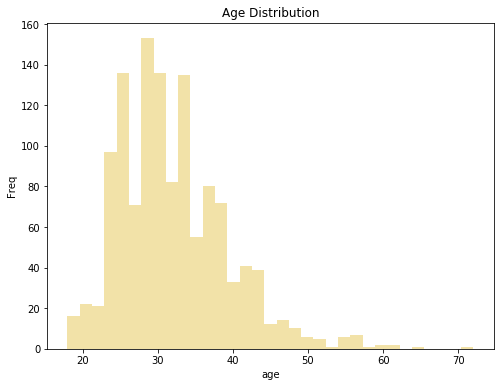

In [115]:
fig,ax = plt.subplots(figsize=(8,6))
sns.distplot(train_df['age'].dropna(),ax=ax,kde=False,color='#dfb726')
plt.title('Age Distribution')
plt.ylabel('Freq')

#### Looking for the columns present after dropping couple of columns. 

In [116]:
train_df.columns

Index(['age', 'gender', 'country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'age_range'],
      dtype='object')

### We have plotted  count for top 10 countries and we can observe from the below visualization the United States is holding first place and New Zealand has the least count.

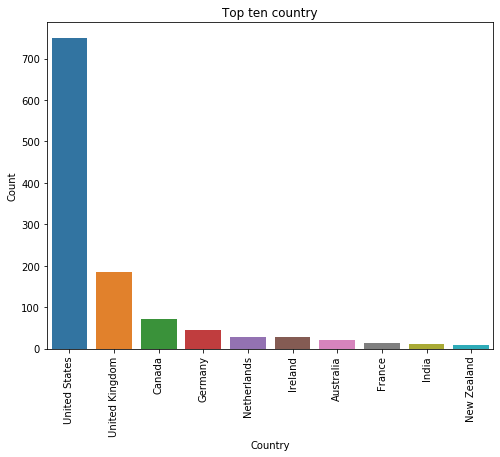

In [117]:
#Top 10 countries:

country_count = Counter(train_df['country'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Top ten country')
plt.xlabel('Country')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

### From the below visualization we can observer that the treatment distribution is almost sharing 50-50 percent. 

Text(0.5, 1.0, 'Treatement Distribution')

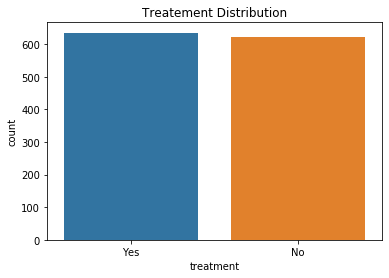

In [85]:
#Treatment Distribution
sns.countplot(train_df['treatment'])
plt.title('Treatement Distribution')

### We have plotted below histogram  to understand the what is the role of family history on the age groups. That means, we would want to know if really family history of diseases is impacting the age groups and it proved to be wrong that family history impacts age. We can observe that the visualization clearly says "No".

In [118]:
train_df['Age_Group'] = pd.cut(train_df['age'].dropna(),
                         [0,18,25,35,45,99],
                         labels=['<18','18-24','25-34','35-44','45+'])

Text(0.5, 1.0, 'Age vs family_history')

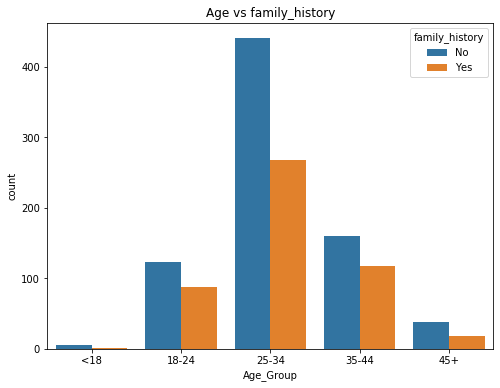

In [119]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data=train_df,x = 'Age_Group',hue= 'family_history',ax=ax)
plt.title('Age vs family_history')

### We observe that the treatments are given for the people with age groups of 25-34. 

Text(0.5, 1.0, 'Age Group vs Treatment')

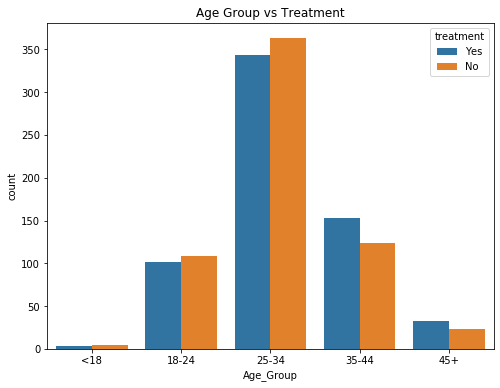

In [89]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = train_df,x = 'Age_Group', hue='treatment')
plt.title('Age Group vs Treatment')

### We observe from the below plot that people with work_interfere are "sometimes" likely to get affetced by the diseases.

Text(0, 0.5, 'Count')

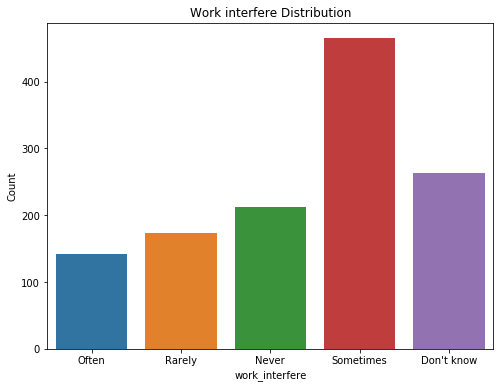

In [120]:
fig,ax  =plt.subplots(figsize=(8,6))
sns.countplot(train_df['work_interfere'].dropna(),ax=ax)
plt.title('Work interfere Distribution')
plt.ylabel('Count')

Text(0.5, 1.0, 'no_employee vs tech_company count')

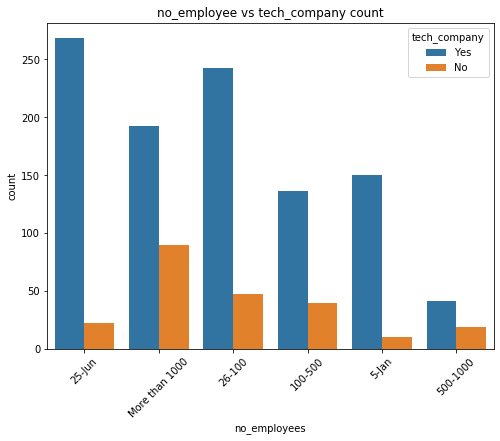

In [121]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data = train_df,x = 'no_employees', hue ='tech_company',ax=ax )
ticks = plt.setp(ax.get_xticklabels(),rotation=45)
plt.title('no_employee vs tech_company count')

## Modeling 

## LabelEncoder is imported done to convert categorical text data into model-understandable numerical data


In [407]:
# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

#Encoding data
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

label_age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_gender ['female', 'male', 'trans']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_employees ['100-500', '25-Jun', '26-100', '5-Jan', '500-1000', 'More than 1000']
label_remote_work ['No', 'Yes']
label_tech_company ['No', 'Yes']
label_benefits ["Don't know", 'No', 'Yes']
label_care_options ['No', 'Not sure', 'Yes']
label_wellness_program ["Don't know", 'No', 'Yes']
label_seek_help ["Don't know", 'No', 'Yes']
label_anonymity ["Don't know", 'No', 'Yes']
label_leave ["Don't know", 'Somewhat difficult', 'Somewhat easy', 'Very difficult', 'Very easy']
label_mental_health_consequence ['Maybe', 'No', 'Yes']
label_phys_health_consequence ['Maybe', 'No', 'Yes']
label

## Label encoding is done to convert categorical text data into model-understandable numerical data


In [408]:
train_df.head()

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,2,1,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,3,1,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,1,0,1,1,2,...,0,1,1,1,2,2,2,0,0,2


## Confusion Matrix is generally used to evaluate quality of the output of a classifier on the data set.


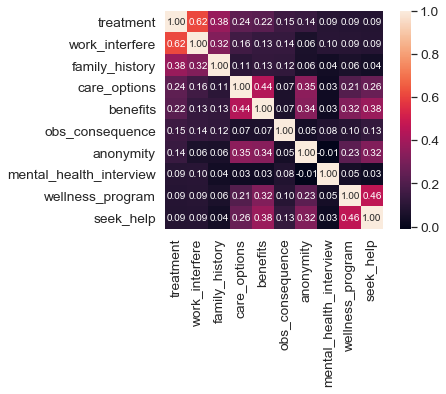

In [409]:
#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = train_df.corr().nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## In order to normalize the data, feature scaling is done in the below step.

In [410]:
# Features Scaling  age, because it is extremely different from the others 
scaler = MinMaxScaler()
train_df['age'] = scaler.fit_transform(train_df[['age']])
train_df.head()


,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,0,0,0,1,2,1,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,1,0,0,0,3,1,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,1,0,0,0,1,0,1,1,2,...,0,1,1,1,2,2,2,0,0,2


In [411]:
print(train_df.isnull().sum())
train_df.shape

age                          0
gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
age_range                    0
dtype: int64


(1257, 24)

## Splitting the data set to train and test sets to perform predictions.

In [412]:
# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Spliltting the dataset

# define X and y
feature_cols = ['age', 'gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = train_df[feature_cols]
y = train_df.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

## Forest is built in the below step to compute feature importance.

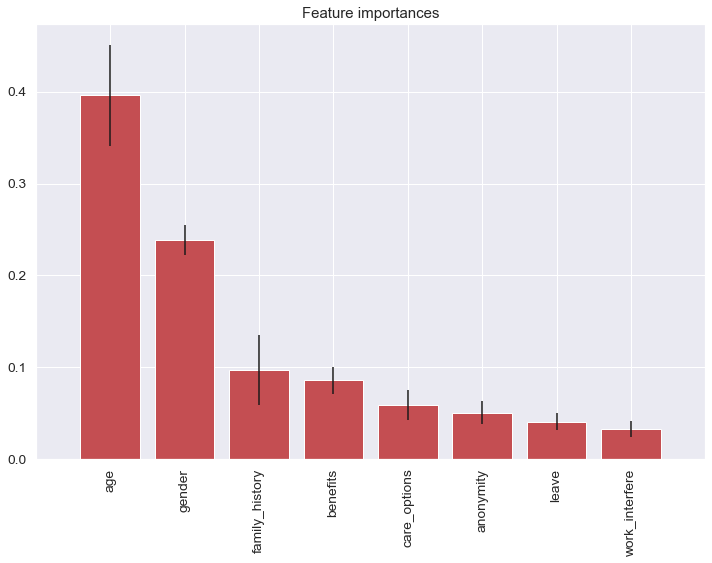

In [413]:
# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])      
    
# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [414]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    
     #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    

## Logistic Regression is used when the dependent variable(target) is categorical to make predictions like 0 or 1.

In [415]:
def logisticRegression():
    # train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)
    
    print('########### Logistic Regression ###############\n')
    
    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)
 
  

########### Logistic Regression ###############

Accuracy: 0.7962962962962963


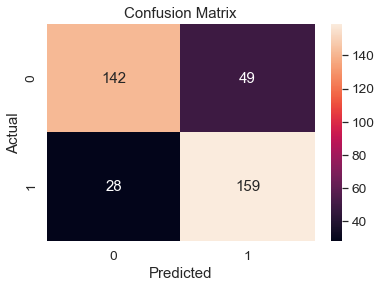

In [416]:
 logisticRegression()

## Random forest consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest splits out a class prediction.

In [417]:
def randomForest():
    # Calculating the best parameters
    forest = RandomForestClassifier(n_estimators = 20)

    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
 
    
    # Building and fitting my_forest
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = my_forest.predict(X_test)
    
    print('########### Random Forests ###############')
    
    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)


########### Random Forests ###############
Accuracy: 0.8121693121693122


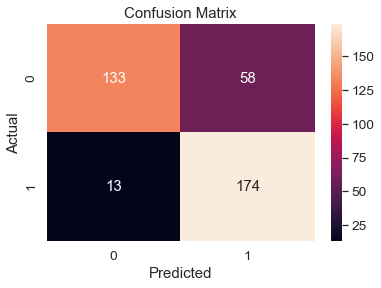

In [418]:
randomForest()

## A Decision Tree is a simple representation for classifying examples. It is a Supervised Machine Learning where the data is continuously split according to a certain parameter.

In [4]:
#Decision tree classifier
from random import randint
def treeClassifier():
    # Calculating the best parameters
    tree = DecisionTreeClassifier()
    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    
    # train a decision tree model on the training set
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = tree.predict(X_test)
    
    print('########### Tree classifier ###############')
    
    accuracy_score = evalClassModel(tree, y_test, y_pred_class, True)


########### Tree classifier ###############
Accuracy: 0.7328042328042328


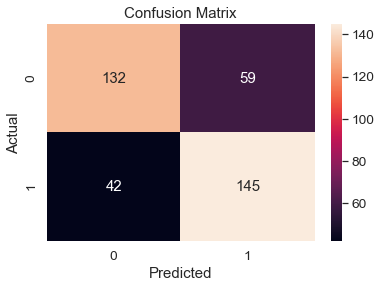

In [420]:
treeClassifier()

## From the above predictions, random forest perfoms the best with accuracy of 0.8121693121693122